---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [298]:
import pandas as pd

energy = pd.read_excel('Energy Indicators.xls', sheet_name=None, skiprows=18, skipfooter=38, header=None)
energy = pd.DataFrame(energy['Energy']).drop([0, 1], axis=1).rename(columns={2: 'Country', 3: 'Energy Supply', 4: 'Energy Supply per Capita', 5: '% Renewable'})
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
5,Angola,642,27,70.909090
6,Anguilla,2,136,0.000000
7,Antigua and Barbuda,8,84,0.000000
8,Argentina,3378,79,24.064520
9,Armenia,143,48,28.236060


In [15]:
import numpy as np

energy[energy == '...'] = np.NaN
energy['Energy Supply'] *= 1000000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9000000,121,88.695650
5,Angola,642000000,27,70.909090
6,Anguilla,2000000,136,0.000000
7,Antigua and Barbuda,8000000,84,0.000000
8,Argentina,3378000000,79,24.064520
9,Armenia,143000000,48,28.236060


In [57]:
energy.Country = energy.Country.str.replace('\s+\([\s\w]*\)\s*|\d', '', regex=True)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9000000,121,88.695650
5,Angola,642000000,27,70.909090
6,Anguilla,2000000,136,0.000000
7,Antigua and Barbuda,8000000,84,0.000000
8,Argentina,3378000000,79,24.064520
9,Armenia,143000000,48,28.236060


In [59]:
def changec(x):
    if x == 'Republic of Korea':
        return "South Korea"
    elif x == 'United States of America':
        return 'United States'
    elif x == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    elif x == 'China, Hong Kong Special Administrative Region':
        return 'Hong Kong'
    else:
        return x

energy.Country = energy.Country.apply(changec)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9000000,121,88.695650
5,Angola,642000000,27,70.909090
6,Anguilla,2000000,136,0.000000
7,Antigua and Barbuda,8000000,84,0.000000
8,Argentina,3378000000,79,24.064520
9,Armenia,143000000,48,28.236060


In [73]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
def changec2(x):
    if x == "Korea, Rep.":
        return "South Korea"
    elif x == "Iran, Islamic Rep.":
        return "Iran"
    elif x == "Hong Kong SAR, China":
        return "Hong Kong"
    else:
        return x
GDP['Country Name'] = GDP['Country Name'].apply(changec2)
GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [299]:
col_name = [ str(x) for x in range(2006, 2016)]
col_name.append('Country Name')
GDP_c = pd.DataFrame(GDP, columns=col_name)
GDP_c

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country Name
0,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN,Aruba
1,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN,Andorra
2,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10,Afghanistan
3,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11,Angola
4,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10,Albania
5,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12,Arab World
6,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11,United Arab Emirates
7,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN,Argentina
8,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10,Armenia
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa


In [91]:
ScimEn_c = ScimEn.iloc[: 15]
ScimEn_c

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [117]:
combine1 = pd.merge(energy, GDP_c, left_on='Country', right_on='Country Name', how='inner').drop('Country Name', axis=1)
combine2 = pd.merge(ScimEn_c, combine1, how='inner')
result = combine2.set_index('Country')
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [119]:
def answer_one():
    return "ANSWER"

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [120]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [121]:
combine1_outer = pd.merge(energy, GDP_c, left_on='Country', right_on='Country Name', how='outer').drop('Country Name', axis=1)
combine2_outer = pd.merge(ScimEn_c, combine1, how='outer')
result_outer = combine2_outer.set_index('Country')
len(result_outer) - len(combine2)

171

In [123]:
def answer_two():
    return "ANSWER"

<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [149]:
for i in range(15):
    print(np.average(result.iloc[i]['2006': ]))

6348608932836.1
15364344302990.0
5542207638235.176
2487906661418.4175
1565459478480.661
1660647466307.512
3493025339072.848
1769297396603.8599
2681724635761.589
1106714508244.852
2120175089933.7761
1418078278145.694
nan
1164042729991.427
2189794143774.9048


In [161]:
def cal_per_gdp(df):
    data = df['2006': ]
    return np.mean(data)
    
avgGDP = result.apply(cal_per_gdp, axis=1).sort_values(ascending=False).rename('avgGDP')
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [162]:
def answer_three():
    Top15 = answer_one()
    return "ANSWER"

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [173]:
sixth_country = result.loc[avgGDP.index[5]]

In [174]:
sixth_country['2015'] - sixth_country['2006']

246702696075.3999

In [ ]:
def answer_four():
    Top15 = answer_one()
    return "ANSWER"

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [175]:
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [178]:
np.mean(result['Energy Supply per Capita'])

157.6

In [ ]:
def answer_five():
    Top15 = answer_one()
    return "ANSWER"

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [181]:
result['% Renewable'].idxmax(), np.max(result['% Renewable'])

('Brazil', 69.64803)

In [ ]:
def answer_six():
    Top15 = answer_one()
    return "ANSWER"

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [182]:
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [183]:
result['radio of cications'] = result['Self-citations'] / result['Citations']
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,radio of cications
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943


In [184]:
result['radio of cications'].idxmax(), result['radio of cications'].max()

('China', 0.6893126179389422)

In [ ]:
def answer_seven():
    Top15 = answer_one()
    return "ANSWER"

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [186]:
result['Population'] = (result['Energy Supply'] / result['Energy Supply per Capita']).sort_values(ascending=False)
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,radio of cications,Population
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.36765e+09
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.17615e+08
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,...,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.27409e+08
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,...,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.3871e+07
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,...,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435e+08
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,...,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.52399e+07
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,...,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.03697e+07
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,...,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.27673e+09
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,...,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.38373e+07


In [189]:
result.iloc[2].name

'Japan'

In [ ]:
def answer_eight():
    Top15 = answer_one()
    return "ANSWER"

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [200]:
# 构建新的特征时记得转换为numpy类型
result['citable doc per person'] = (result['Citable documents'] / result['Population']).astype(np.float64)
result['Energy Supply per Capita'] = result['Energy Supply per Capita'].astype(np.float64)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Brazil
Data columns (total 23 columns):
Rank                        15 non-null int64
Documents                   15 non-null int64
Citable documents           15 non-null int64
Citations                   15 non-null int64
Self-citations              15 non-null int64
Citations per document      15 non-null float64
H index                     15 non-null int64
Energy Supply               15 non-null object
Energy Supply per Capita    15 non-null float64
% Renewable                 15 non-null float64
2006                        15 non-null float64
2007                        15 non-null float64
2008                        15 non-null float64
2009                        15 non-null float64
2010                        15 non-null float64
2011                        15 non-null float64
2012                        15 non-null float64
2013                        15 non-null float64
2014                        15 non-null flo

In [201]:
result['citable doc per person'].corr(result['Energy Supply per Capita'])

0.7940010435442946

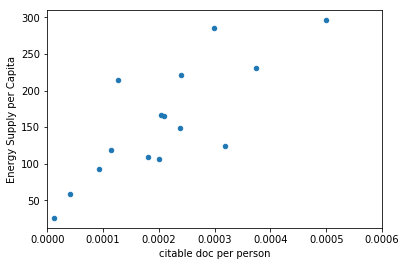

In [203]:
import matplotlib as plt
%matplotlib inline

result.plot(x='citable doc per person', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [ ]:
def answer_nine():
    Top15 = answer_one()
    return "ANSWER"

In [ ]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the 'median' for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [211]:
avg = result['% Renewable'].median()
HighRenew = (result['% Renewable'].apply(lambda x: 1 if x>=avg else 0)).rename('HighRenew')
HighRenew

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [ ]:
def answer_ten():
    Top15 = answer_one()
    return "ANSWER"

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [212]:
result.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,radio of cications,Population,citable doc per person
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.36765e+09,0.000093
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.17615e+08,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.27409e+08,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.3871e+07,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435e+08,0.000128


In [233]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Brazil
Data columns (total 23 columns):
Rank                        15 non-null int64
Documents                   15 non-null int64
Citable documents           15 non-null int64
Citations                   15 non-null int64
Self-citations              15 non-null int64
Citations per document      15 non-null float64
H index                     15 non-null int64
Energy Supply               15 non-null object
Energy Supply per Capita    15 non-null float64
% Renewable                 15 non-null float64
2006                        15 non-null float64
2007                        15 non-null float64
2008                        15 non-null float64
2009                        15 non-null float64
2010                        15 non-null float64
2011                        15 non-null float64
2012                        15 non-null float64
2013                        15 non-null float64
2014                        15 non-null flo

In [234]:
result.Population = result.Population.astype(np.float64)

In [235]:
group_countries = result['Population'].reset_index()
group_countries.Country = group_countries.Country.map({'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'})
group_countries

,Country,Population
0,Asia,1.367645e+09
1,North America,3.176154e+08
2,Asia,1.274094e+08
3,Europe,6.387097e+07
4,Europe,1.435000e+08
5,North America,3.523986e+07
6,Europe,8.036970e+07
7,Asia,1.276731e+09
8,Europe,6.383735e+07
9,Asia,4.980543e+07


In [238]:
group_countries.groupby('Country')['Population'].agg([('size', len), ('sum', 'sum'), ('mean', 'mean'), ('std', np.std)])

,size,sum,mean,std
Country,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [ ]:
def answer_eleven():
    Top15 = answer_one()
    return "ANSWER"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [239]:
result.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,radio of cications,Population,citable doc per person
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128


In [251]:
result.iloc[0].name

'China'

In [258]:
mapping = { 'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
def trans_continent(se):
    x = se.name
    return mapping[x]

result['Continent'] = result.apply(trans_continent, axis=1)
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,radio of cications,Population,citable doc per person,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,Asia
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,North America
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,Asia
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,Europe
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,Europe
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,North America
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,Europe
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,Asia
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,Europe


In [262]:
result['Renewable bins'] = pd.cut(result['% Renewable'], 4)
result['Renewable bins'] 

Country
China                 (19.122, 35.964]
United States          (2.212, 19.122]
Japan                  (2.212, 19.122]
United Kingdom         (2.212, 19.122]
Russian Federation     (2.212, 19.122]
Canada                (52.806, 69.648]
Germany                (2.212, 19.122]
India                  (2.212, 19.122]
France                 (2.212, 19.122]
South Korea            (2.212, 19.122]
Italy                 (19.122, 35.964]
Spain                 (35.964, 52.806]
Iran                   (2.212, 19.122]
Australia              (2.212, 19.122]
Brazil                (52.806, 69.648]
Name: Renewable bins, dtype: category
Categories (4, interval[float64]): [(2.212, 19.122] < (19.122, 35.964] < (35.964, 52.806] < (52.806, 69.648]]

In [276]:
result.groupby(['Continent', 'Renewable bins'])['% Renewable'].apply(np.size)

Continent      Renewable bins  
Asia           (2.212, 19.122]     4
               (19.122, 35.964]    1
Australia      (2.212, 19.122]     1
Europe         (2.212, 19.122]     4
               (19.122, 35.964]    1
               (35.964, 52.806]    1
North America  (2.212, 19.122]     1
               (52.806, 69.648]    1
South America  (52.806, 69.648]    1
Name: % Renewable, dtype: int64

In [263]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [277]:
result.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,radio of cications,Population,citable doc per person,Continent,Renewable bins
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,Asia,"(19.122, 35.964]"
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,North America,"(2.212, 19.122]"
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,Asia,"(2.212, 19.122]"
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,Europe,"(2.212, 19.122]"
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,Europe,"(2.212, 19.122]"


In [279]:
result.Population

Country
China                 1.367645e+09
United States         3.176154e+08
Japan                 1.274094e+08
United Kingdom        6.387097e+07
Russian Federation    1.435000e+08
Canada                3.523986e+07
Germany               8.036970e+07
India                 1.276731e+09
France                6.383735e+07
South Korea           4.980543e+07
Italy                 5.990826e+07
Spain                 4.644340e+07
Iran                  7.707563e+07
Australia             2.331602e+07
Brazil                2.059153e+08
Name: Population, dtype: float64

In [288]:
result.StrPopulation = result.Population.astype(np.unicode_).rename('PopEst')
PopEst = result.StrPopulation
PopEst

Country
China                 1367645161.2903225
United States         317615384.61538464
Japan                 127409395.97315437
United Kingdom        63870967.741935484
Russian Federation           143500000.0
Canada                 35239864.86486486
Germany                80369696.96969697
India                 1276730769.2307692
France                 63837349.39759036
South Korea           49805429.864253394
Italy                 59908256.880733944
Spain                   46443396.2264151
Iran                   77075630.25210084
Australia             23316017.316017315
Brazil                205915254.23728815
Name: PopEst, dtype: object

In [294]:
def plus_comma(x):
    x = list(x)
    if x.index('.'):
        pos = x.index('.')
        while( pos-3>0 ):
            x.insert(pos-3, ',')
            pos = pos - 3
    return ''.join(x)

PopEst.apply(plus_comma)

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [ ]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [295]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!